# Classification

The hypothesis function $h_\theta(x)$ should now map to values between 0 and 1. One way to do this is using the logistic or sigmoid funciton:

$h_\theta(x) = g(\theta^T x)$, with <br>
$g(z) = \sigma(z) = \frac{1}{1+e^{-z}}$

For the loss function, we could choose the same as for linear regression (SSE): <br><br>
$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} \text{Cost}(y_i,h_{\theta} x_i) =\frac{1}{2m}\sum_{i=1}^{m} (y_i-h_{\theta} x_i)^2$, <br><br>
but this function is not convex. Thus we could get stuck in local minima. Instead we use:

$\text{Cost}(y_i,h_{\theta} x_i) = -log(h_{\theta} x_i)$ if <t> y = 1 and <br>
$\text{Cost}(y_i,h_{\theta} x_i) = -log(1-h_{\theta} x_i)$ if y = 0 <br><br>
    
This 2 cost functions can be combined into one, like so: <br>
$\text{Cost}(y_i,h_{\theta} x_i) = - y\,log(h_{\theta} x_i) - (1-y)log(1-h_{\theta} x_i)$ <br><br>
The whole cost function then reads like: <br>
$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}- y\,log(h_{\theta} x_i) - (1-y)log(1-h_{\theta} x_i)$ <br><br>

With $h = g(\theta^T x)$, we can rewrite this in vectorized form: <br>
$J(\theta) = \frac{1}{m} (- y^T\,log(h) - (1-y)^T\,log(1-h))$ <br><br>

Baring in mind that $\frac{\partial{g}}{\partial z} = g(1-g)$ and  $\frac{\partial{g(x\theta)}}{\partial \theta} = x\,g(1-g)$, <br>

we get after some calculus:
$\frac{\partial{J}}{\partial \theta_j} = \sum_{i=1}^{m}(h(x^i)-y)x_j$ <br><br>

Remembering the update function from lecture 1: <br>
Update: $\theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j} J(\theta)$, we get: <br>
$\theta_j = \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m}(h(x^i)-y)x^i_j$

The vectorized implementation is:
$\theta = \theta - \frac{\alpha}{m} X^T(g(X\theta)-\vec{y})$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,100)
y1 = lambda x: -np.log(x)
y0 = lambda x: -np.log(1-x)
cost1 = y1(x)
cost0 = y0(x)

/Users/dennis.doerrich/Work/Stanford-ML/py37SML/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/dennis.doerrich/Work/Stanford-ML/py37SML/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


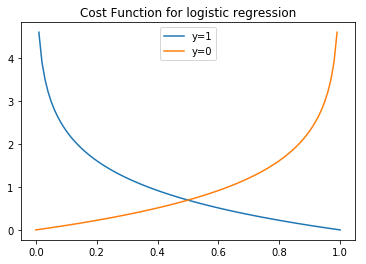

In [2]:
fig1, ax1 = plt.subplots(1)
ax1.plot(x,cost1, label='y=1')
ax1.plot(x,cost0, label='y=0')
ax1.set_title('Cost Function for logistic regression')
ax1.legend()

In [3]:
import pandas as pd
import numpy as np
import scipy.optimize as op
data = pd.read_csv('ex2data2.txt', header = None)
data.columns = ['f1', 'f2', 'target']
data['f0'] = np.ones(len(data))
data['f3'] = np.power(data['f1'],2)
data['f4'] = np.power(data['f2'],2)
data['f5'] = data['f1'] + data['f2']

y = data.pop('target')
X = data
w = np.ones([6,1])

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z));

def cost_function(w, X, y):
    X = np.array(X)
    y = np.array(y)
    m,n = X.shape
    y_hat = sigmoid(X.dot(w).ravel())
    term1 = -y*np.log(sigmoid(y_hat))
    term2 = -(1-y)*np.log(1-y_hat)
    J = np.sum(term1+term2)/m
    return J

def gradient(w, X, y):
    X = np.array(X)
    y = np.array(y)
    m , n = X.shape
    y_hat = sigmoid(X.dot(w).ravel())
    grad = ((X.T).dot(y_hat-y))/m;
    return np.array(grad)

In [5]:
Result = op.minimize(fun = cost_function, 
                     x0 = w, 
                     args = (X, y),
                     method = 'TNC',
                     jac = gradient);
w_opt = Result.x

In [6]:
print(cost_function(w,X,y))
print(cost_function(w_opt,X,y))

1.4640078832254932
0.4045571719238313


In [7]:
y_hat = sigmoid(X.dot(w_opt).ravel())
data['y_hat'] = (y_hat>0.5).astype(int)
data['y_color'] = data['y_hat'].apply(lambda x: 'b' if x==1 else 'r')

In [8]:
f1 = np.linspace(-1,1,100)
f2 = np.linspace(-1,1,50)
F1, F2 = np.meshgrid(f1,f2)

In [9]:
def f2x(f1,f2):
    return np.array([f1,f2,1,np.power(f1,2), np.power(f2,2),f1+f2])

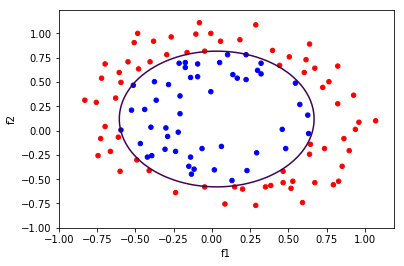

In [10]:
# Plot Decision Boundary
s = F1.shape
z = np.zeros(s)
for i in range(s[0]):
    for j in range(s[1]):
        z[i,j] = sigmoid(np.dot(f2x(F1[i,j], F2[i,j]),w_opt))

fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
ax2.contour(F1, F2, z, 0.5)
data.plot.scatter('f1', 'f2', c=data['y_color'], ax=ax2)